# Repeater Code bit flip

In [9]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import job_monitor
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [10]:
#secondary modules
import numpy as np
import matplotlib.pyplot as plt

## Definition of the initial quantum circuits

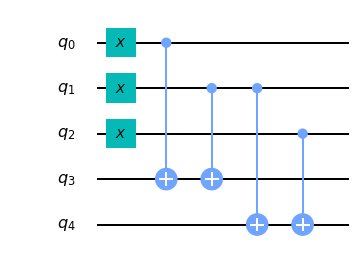

In [11]:
#Here we define the quantum circuits with 5 qubits, 2 syndrome qubits(3,4) and 3 qubits(0,1,2).
circ = QuantumCircuit(5)

#Induced flip errors 
circ.x(0)
circ.x(1)
circ.x(2)

#Z1Z2 Measurements
circ.cx(0,3)
circ.cx(1,3)

#Z2Z3 Measurements
circ.cx(1,4)
circ.cx(2,4)

circ.draw()

## We add the two ZZ measurements to the syndrom qubits

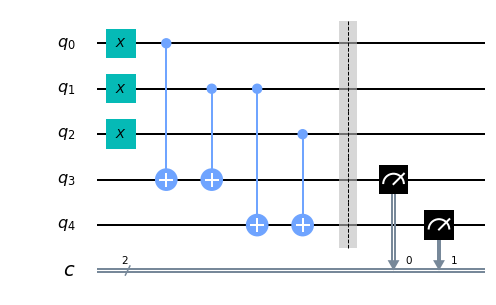

In [12]:
#Measure barrier (Not really useful but nice for the eyes)
meas = QuantumCircuit(5,2)
meas.barrier(range(5))
# map the quantum measurement to the classical bits
meas.measure(3,0)
meas.measure(4,1)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

## Simulating on the quantum simulator

In [42]:

backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
shots = 2048
job_sim = execute(qc, backend_sim, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'00': 2048}


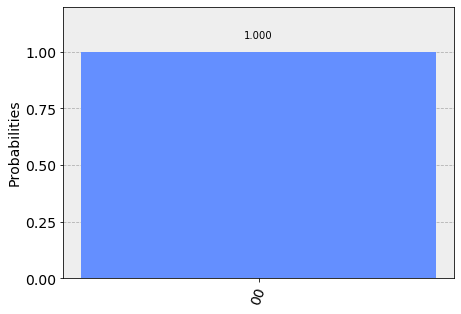

In [43]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Running the code on a real machine

In [15]:
provider = IBMQ.get_provider(group='open')
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [44]:
shots_exp = 2048

backend = provider.get_backend('ibmq_vigo')
job_exp = execute(qc, backend=backend, shots = shots_exp)
job_monitor(job_exp)

Job Status: job has successfully run


In [45]:
result_exp = job_exp.result()

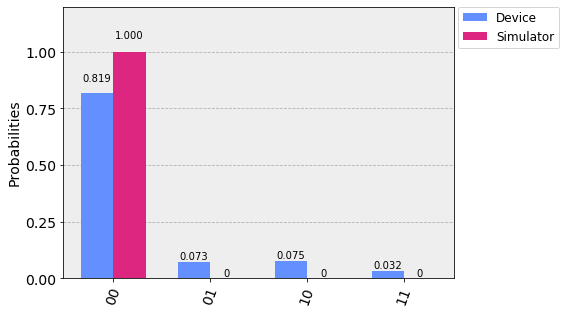

In [46]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [47]:
print(counts_exp)

{'01': 150, '00': 1678, '10': 154, '11': 66}


In [48]:
print(counts)

{'00': 2048}


## Data Analysis

Let's suppose all of our spins start in the state |000> and we induce errors manually using X gates.

In [57]:
#Case for 0 or all bit flips
P_00 = counts_exp['00']/shots_exp*100
P_01 = counts_exp['01']/shots_exp*100
P_10 = counts_exp['10']/shots_exp*100
P_11 = counts_exp['11']/shots_exp*100


print('There is ',P_00,'percent chance that either all the spins remained in their initial states or that they all flipped.')
print('There is ',P_01,'percent chance that either the last spin flipped or that the first two flipped.')
print('There is ',P_10,'percent chance that either the first spin flipped or that the last two flipped.')
print('There is ',P_11,'percent chance that either the middle spin flipped or that the first one and the last one flipped.')

There is  81.93359375 percent chance that either all the spins remained in their initial states or that they all flipped.
There is  7.32421875 percent chance that either the last spin flipped or that the first two flipped.
There is  7.51953125 percent chance that either the first spin flipped or that the last two flipped.
There is  3.22265625 percent chance that either the middle spin flipped or that the first one and the last one flipped.


## Error

In [60]:
Err = 100 - P_00
print('There is',Err,'percent of error on this machine.')

There is 18.06640625 percent of error on this machine.
